# RAHMA FAHIM K

## Unemployement Analysis with Python



#### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
%matplotlib inline
import calendar

In [2]:
import datetime as dt

import plotly.io as pio 
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

#### Reading the Datasets

In [4]:
df = pd.read_csv(r"C:\Users\Rahma Fahim\OneDrive\Documents\oasis\Unemployment in India.csv")

In [5]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [8]:
df.shape

(754, 7)

In [9]:
#checking for null values
df.isna().values.any()

True

In [10]:
df.isna().sum()

Region                                      14
 Date                                       14
 Frequency                                  14
 Estimated Unemployment Rate (%)            14
 Estimated Employed                         14
 Estimated Labour Participation Rate (%)    14
Area                                        14
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [13]:
df.shape

(740, 7)

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [16]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [17]:
df.columns=['State','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate', 'Area']

In [18]:
# to print the state with highest unemployment
print("State with highest Unemployment:-",df['State'].value_counts().idxmax())

State with highest Unemployment:- Andhra Pradesh


In [19]:
# to print the state with lowest unemployment
print("State with Lowest Unemployment:-",df['State'].value_counts().idxmin())

State with Lowest Unemployment:- Chandigarh


In [20]:
#to print the month of unemployment

import datetime as dt
import calendar

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [21]:
df["Date"]

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
749   2020-02-29
750   2020-03-31
751   2020-04-30
752   2020-05-31
753   2020-06-30
Name: Date, Length: 740, dtype: datetime64[ns]

In [22]:
df['month_int'] =  df['Date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])


In [23]:
df["month_int"]

0      5
1      6
2      7
3      8
4      9
      ..
749    2
750    3
751    4
752    5
753    6
Name: month_int, Length: 740, dtype: int64

In [24]:
df["month"]

0      May
1      Jun
2      Jul
3      Aug
4      Sep
      ... 
749    Feb
750    Mar
751    Apr
752    May
753    Jun
Name: month, Length: 740, dtype: object

In [25]:
#to print the month with highest unemployment

print("Month with highest Unemployment:-",df['month'].value_counts().idxmax())

Month with highest Unemployment:- May


In [26]:
#to print the month with lowest unemployment

print("Month with lowest Unemployment:-",df['month'].value_counts().idxmin())

Month with lowest Unemployment:- Apr


In [27]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [28]:
#drop the unwanted columns

df.drop(columns=['Frequency','month_int'])

,State,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [29]:
#top 10 states with highest unemployment

df1=df[['State','Estimated Unemployment Rate']].groupby('State').sum().sort_values(by='Estimated Unemployment Rate',ascending=False)


In [30]:
df1.head(10)

,Estimated Unemployment Rate
State,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


#### visualization

Text(0, 0.5, 'Number of people unemployed in %')

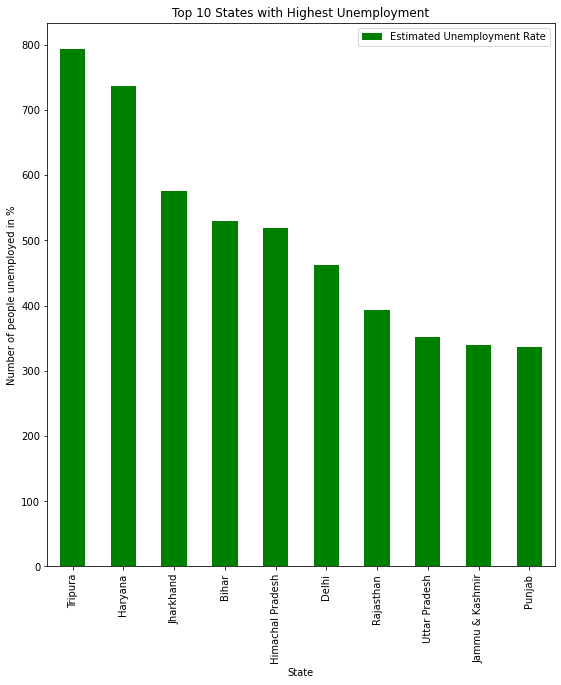

In [31]:
fig=plt.figure()
plot =fig.add_subplot(1,2,1) 
df1[:10].plot(kind="bar",color="green",figsize=(20,10),ax=plot)
plot.set_title("Top 10 States with Highest Unemployment")
plot.set_xlabel("State")
plot.set_ylabel("Number of people unemployed in %")

In [32]:
# months with highest unemployment

df2 = df[["month","Estimated Unemployment Rate"]].groupby("month").sum().sort_values(by="Estimated Unemployment Rate", ascending  =False)
df2.head(10)

,Estimated Unemployment Rate
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


Text(0, 0.5, 'Number of People Unemployed (in %)')

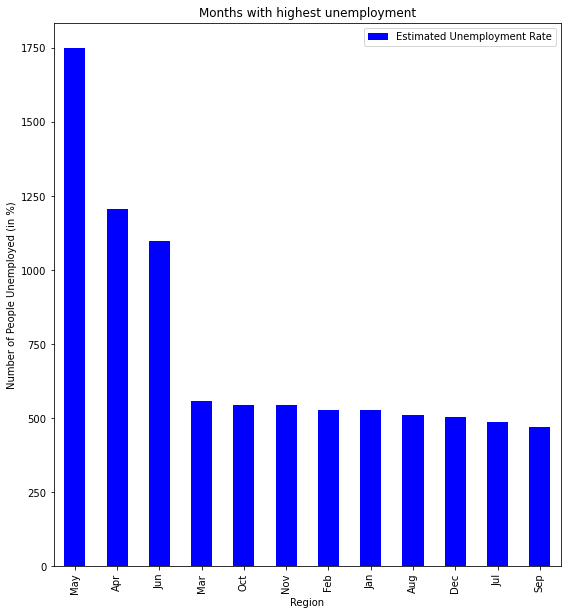

In [33]:
fig=plt.figure()
plot2=fig.add_subplot(1,2,1)
df2[:12].plot(kind="bar",color="blue",figsize=(20,10),ax=plot2)
plot2.set_title("Months with highest unemployment")
plot2.set_xlabel("Region")
plot2.set_ylabel("Number of People Unemployed (in %)")

In [34]:
# To visulize labour participation rate & unemployment rate in each month


IND =  df.groupby(["month"])[['Estimated Unemployment Rate', "Estimated Employed", "Estimated Labour Participation Rate"]].mean()
IND = pd.DataFrame(IND).reset_index()
month = IND.month
unemployment_rate = IND["Estimated Unemployment Rate"]
labour_participation_rate = IND["Estimated Labour Participation Rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout(title="Uneployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})

fig.show()

Text(0, 0.5, 'Number of People Employed (in %)')

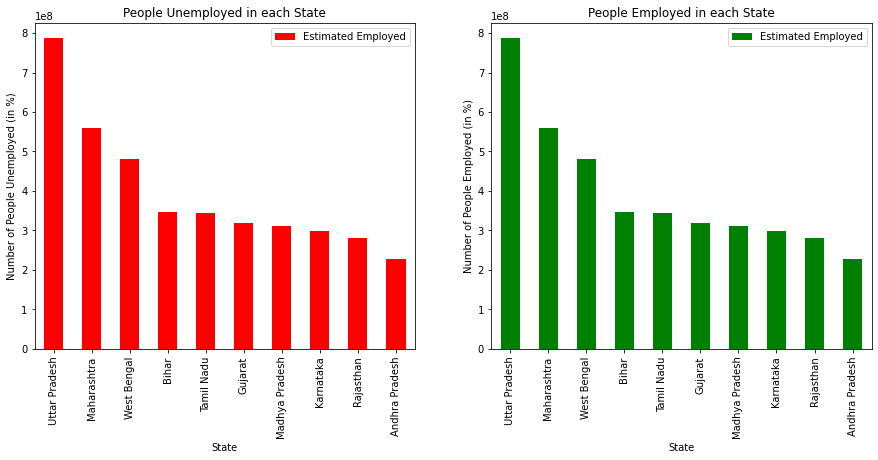

In [35]:
# State wise rate of unemplyement

df1 = df[["State","Estimated Employed"]].groupby("State").sum().sort_values(by="Estimated Employed", ascending =False)
df1.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Unemployed
df1[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Unemployed in each State")
ax0.set_xlabel("State")
ax0.set_ylabel("Number of People Unemployed (in %)")

#Employed
df1[:10].plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Employed in each State")
ax1.set_xlabel("State")
ax1.set_ylabel("Number of People Employed (in %)")

In [36]:
# bar plot unemployment rate (monthly)

fig = px.bar(df, x='State',y='Estimated Unemployment Rate', animation_frame = 'month', color='State',
            title='Unemployment rate (State)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000

fig.show()

### Inferences:

#### 1. State with highest Unemployment:- Andhra Pradesh
#### 2. State with Lowest Unemployment:- Chandigarh
#### 3. Month with highest Unemployment:- May
#### 4. Month with lowest Unemployment:- April
#### 5. Graph Progress: Higher The labour participation Lower the unemployment rate